## Questão de Negócio


A empresa Star Jeans! Eduardo e Marcelo são dois brasileiros, amigos e sócios de empreendi-
mento. Depois de vários negócio bem sucedidos, eles estão planejando entrar no mercado de moda
dos USA como um modelo de negócio do tipo E-commerce.
A idéia inicial é entrar no mercado com apenas um produto e para um público específico, no caso
o produto seria calças Jenas para o público masculino. O objetivo é manter o custo de operação
baixo e escalar a medida que forem conseguindo clientes.
Porém, mesmo com o produto de entrada e a audiência definidos, os dois sócios não tem experiência
nesse mercado de moda e portanto não sabem definir coisas básicas como preço, o tipo de calça e
o material para a fabricação de cada peça.
Assim, os dois sócios contrataram uma consultoria de Ciência de Dados para responder as seguintes
perguntas: 

1. Qual o melhor preço de venda para as calças? 

2. Quantos tipos de calças e suas
cores para o produto inicial? 

3. Quais as matérias-prima necessárias para confeccionar as calças?

Obs.: As principais concorrentes da empresa Start Jeans são as americadas H&M e Macys.

## Etapa 01 - Extração de Dados em HTML


### método Cíclico

Ciclo do CRISP

In [2]:
from IPython.display import Image

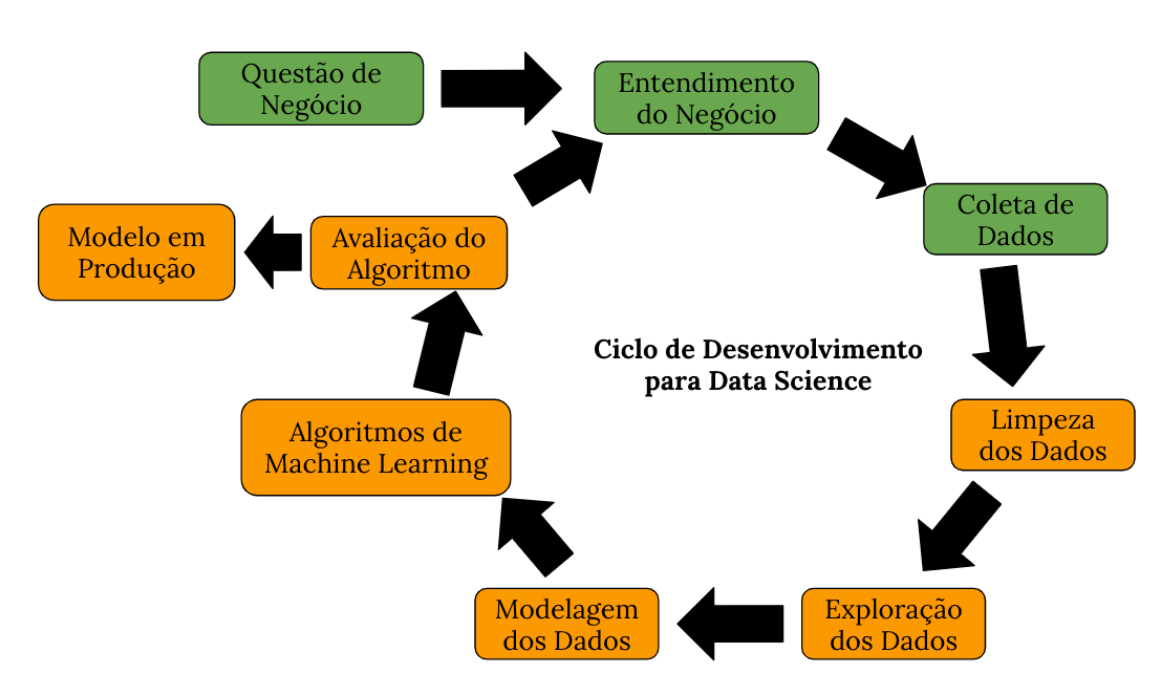

In [4]:
PATH = '/home/bruno/repos/ds_ao_dev-webscraping/notebook/image/crisp_ds.png'
Image( filename = PATH, width=900, height=700)

# Método SAPE

## SOLUÇÃO DO PROBLEMA DE NEGOCIO:


**Planejamento da Solução - O método SAPE (Saida, Processo e Entrada)**

1.0 Qual o melhor preço de venda para calças?
2.0 Quantos tipos de calças e suas cores para o produto inicial?
3.0 Quais as matérias-prima necessárias para confeccionar as calças?



* Saída: ( Produto final do projeto )
    1. Resposta para a pergunta.
        * Apresentação dos valores medios por modelo de calça.
   
    2. Formato.
        * Tabela e grafico.
    
    3. Local da entrega.
        * App no StreamLit

* Processo ( Passo a Passo )
        1. passo a Passo para calcular a resposta?
            - Mediana do preço por categoria e tipo.
        2. Como será o gráfico oi tabela final?
            - Simulação da tabela final
        3. Como será o local de entrega?
            - App no Streamlit e publica-lo no heroku

* Entrada
    1. WebScraping no sites da H&M e Macy's

# WebScpraing

### Extração de Dados em HTML
O funcionamento de uma API e requisições de dados

 O que é uma API?

* Application Programming Interface

API é um acrônimo para Application Programming Interface. 1. API é um software intermediário
que permite com que duas aplicações troquem mensagens entre si. 2. API é uma forma de comu-
nicação entre dois sistemas. 3. API é uma forma de fornecer um produt/serviço sem expor todo o
desenvolvimento interno.


Requisições em API

Requisições são “pedidos” para API, onde o requisitante fornece dados de entrada e recebe um
objeto como saída. Os pedidos são feitos através dos métodos implementados na API.

## Beautfull Soup - Teoria

doc: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

Beautifull Soup → biblioteca de python esoecializada em extrair dados em HTML webscraping

* Parser = codigo para encontrar e extrair estruturas de html e xml
* Find_all = principal metodo de extração dos dados
* instalando o Beautfull Soup: from bs4 import BeautifulSoup

# Webscraping with BeatifulSoup

## Collect Data - Vitrine

In [2]:
import re #regex Library
import warnings
import inflection
import requests

# Tratamento dos dadas
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

#Navegador Selenium
from selenium              import webdriver
from selenium              import webdriver
from IPython.display       import Image
from IPython.core.display  import HTML
from datetime              import datetime
from bs4                   import BeautifulSoup


warnings.filterwarnings( 'ignore' )

#driver = webdriver.Chrome('/home/user/drivers/chromedriver')
from webdriver_manager.chrome import ChromeDriverManager
#https://pypi.org/project/webdriver-manager/#use-with-chrome

In [3]:
# Help funcitons
def jupyter_settings():
    #%matplotlib notebook
    #%pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

In [4]:
#URL to webscraping
url = 'https://www2.hm.com/en_us/men/products/jeans.html'

# Request to URL
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5)AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
page = requests.get( url, headers=headers )

# Beautiful Soup object
soup = BeautifulSoup( page.text, 'html.parser' )

#==========================================Vitrine
products = soup.find( 'ul', class_='products-listing small' )
product_list = products.find_all('article', class_='hm-product-item')

# Product ID
product_id = [p.get( 'data-articlecode' ) for p in product_list]

# Product Category
product_category = [p.get( 'data-category' ) for p in product_list]

# Product Name
product_list = products.find_all('a', class_='link')
product_name = [p.get_text() for p in product_list]

# Product Price
product_list = products.find_all('span', class_='price regular')
product_price = [p.get_text() for p in product_list]

# Create DataFrame
data = pd.DataFrame([product_id, product_category, product_name, product_price]).T
data.columns = ['product_id', 'product_category', 'product_name', 'product_price']

# Scrapy Datetime
data['scrapy_datetime'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

## Data collection by product

In [20]:
# Dicionario que simula um Browser (Chromme, Safari, Firefox ..)
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5)AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

df_decompositions = pd.DataFrame()

# Elementos unicos dos produtos
aux = []

# Pattern table
cols = ['Art. No.', 'Composition', 'Fit', 'Size']
df_pattern = pd.DataFrame(columns=cols, dtype='object')

for i in range(len(data)):
    #url = 'https://www2.hm.com/en_us/productpage.'+ data.loc[i, 'product_id'] + '.html'
    url = 'https://www2.hm.com/en_us/productpage.'+ '0985197001' + '.html'
    print(url) #→ testar a paginação
        
    page = requests.get( url, headers=headers )
    #
    ## Beautiful Soup object
    soup = BeautifulSoup( page.text, 'html.parser' )
    #
    ##====================================================
    ## ======================================== color_name
    # ao concater os links das classe usando a classe 'filter-option miniature active' asseguro coletar todas as cores
    product_list = soup.find_all('a', class_='filter-option miniature active') + soup.find_all('a', class_='filter-option miniature') 
    color_name = [p.get('data-color') for p in (product_list)]
    #
    ##product_id
    product_id = [p.get('data-articlecode') for p in (product_list)]
    #
    ## Criar DataFrame dos produtos pela cor
    df_color = pd.DataFrame( [product_id, color_name]).T
    df_color.columns = ['product_id', 'color_name']
    #
    ## Gerando style_id + color_id
    #df_color['style_id'] = df_color['product_id'].apply(lambda x: x[:-3])
    #df_color['color_id'] = df_color['product_id'].apply(lambda x: x[-3:])
    ###====================================================
    ###======================================== composition
    ### Split e limpeza dos dados
    composition_list = soup.find_all('div', class_ = 'details-attributes-list-item')
    #composition_list = soup.find_all('div', class_ = 'ProductDescription-module--productDescription__2mqXe')
    product_composition = [list(filter (None, p.get_text().split('\n') ) ) for p in composition_list] 
    ##
    # Rename dataframe
    df_composition = pd.DataFrame(product_composition).T
    df_composition.columns = df_composition.iloc[0]
    ##
    # Deleting first line
    df_composition = df_composition[['Fit','Composition','Art. No.']] #→retorna apenas as colunas declaradas
    df_composition = df_composition.iloc[1:].fillna(method='ffill')
    ##
    ### Remove duplicated lines
    df_composition = df_composition.drop_duplicates(subset=None, keep='first', inplace=False)
    
    # Remove Pocket-lining, shell and lining
    df_composition['Composition'] = df_composition['Composition'].str.replace('Pocket lining: ', '', regex=True)
    df_composition['Composition'] = df_composition['Composition'].str.replace('Shell: ', '', regex=True)
    df_composition['Composition'] = df_composition['Composition'].str.replace('Lining: ', '', regex=True)
        
    ##====================================================
    ##======================================== Composition
    #composition_list = soup.find_all('dd')
    ## Split e limpeza dos dados
    #product_composition = [list(filter (None, p.get_text().split('\n') ) ) for p in composition_list] 
#
    ## Criando dataframe
    #df_composition = pd.DataFrame(product_composition).T
#
    ## Nomeando as colunas
    #df_composition.rename({3: 'product_id', 1: 'fit', 2: 'composition', 0: 'size' }, axis=1, inplace=True)
#
    ### Deletando a 1 linha
    #df_composition = df_composition[['size', 'fit', 'composition', 'product_id']] #→retorna apenas as colunas declaradas
    #df_composition = df_composition.iloc[0:].fillna(method='ffill')
#
    ## Eliminando linhas duplicadas
    #df_composition = df_composition.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
#
    ## Gerando style_id + color_id
    #df_composition['style_id'] = df_composition['product_id'].apply(lambda x: x[:-3])
    #df_composition['color_id'] = df_composition['product_id'].apply(lambda x: x[-3:])
#
#
    ## Concatenando os dois dataframes
    ##data_sku = pd.merge( df_color, df_composition[['style_id','fit','composition', 'size']],
    ##                    how='left', on='style_id')
##
    ##data_sku.head()
    #
    ## Garantee the same number of columns
    df_composition = pd.concat([df_pattern, df_composition], axis=0)
    #    
    ## Garantee style_id + color_id
    #df_composition['style_id'] = df_composition['product_id'].apply(lambda x: x[:-3])
    #df_composition['color_id'] = df_composition['product_id'].apply(lambda x: x[-3:])
    
    # Rename columns
    df_composition.columns=['product_id', 'composition', 'fit', 'size']
    #
    ## Keep new columns if it shows up
    aux = aux + df_composition.columns.tolist()
    #
    ## Merge data color + composition
    df_composition = pd.merge(df_composition, df_color, how='left', on='product_id')
    #
    ## All details products
    df_compositions = pd.concat([df_compositions, df_composition], axis=0)
    bbbbb
# Executando o JOin da vitrine com os detalhes dos produtos
#data['style_id'] = data['product_id'].apply(lambda x: x[:-3])
#data['color_id'] = data['product_id'].apply(lambda x: x[-3:])
#
## Granularidade Produto → cor
#data_raw = pd.merge(data, df_details[['style_id', 'color_name',
#                                      'fit','composition', 'size']], how='left', on='style_id')

https://www2.hm.com/en_us/productpage.0985197001.html


NameError: name 'aux' is not defined

In [21]:
df_composition

,Art. No.,Composition,Fit,Size
1,0985197001,"Cotton 98%, Spandex 2%",Slim fit,NaN
2,0985197001,Cotton 100%,Slim fit,NaN


In [22]:
df_color

,product_id,color_name
0,0985197001,Black
1,0985197002,Midnight blue
2,0985197003,Denim blue
3,0985197004,Dark denim blue
4,0985197005,Dark denim blue
5,0985197006,Light denim blue
6,0985197007,Dark gray


## Data cleaning 

In [ ]:
# product id
data = data.dropna( subset=['product_id'] )
data['product_id'] = data['product_id'].astype( int )

# product name
data['product_name'] = data['product_name'].apply( lambda x: x.replace( ' ', '_' ).lower())

# product price
data['product_price'] = data['product_price'].apply(lambda x: x.replace( '$ ', '' )).astype(float)

# scrapy datetime
data['scrapy_datetime'] = pd.to_datetime(data['scrapy_datetime'],format='%Y-%m-%d %H:%M:%S' )

# style id
data['style_id'] = data['style_id'].astype( int )

# color id
data['color_id'] = data['color_id'].astype( int )

#color name
data['color_name'] = data['color_name'].apply( lambda x: x.replace(' ', '_' ).replace( '/', '_' ).lower() if pd.notnull( x ) else x )

# fit
data['fit'] = data['fit'].apply( lambda x: x.replace( ' ', '_' ).lower() if pd.notnull( x ) else x )
# quando houver valores nulos, acrescentar o notnull...

In [ ]:
# size number
#data['size_number'] = data['size'].apply( lambda x: re.search('(\d{3}cm)', x ).group(0) if pd.notnull( x ) else x)
#data['size_number'] = data['size_number'].apply( lambda x: re.search( '(\d{3})', x).group(0) if pd.notnull( x ) else x ).astype(float)

data['size_number'] = data['size'].str.extract( '(\d{3}cm)')
data['size_number'] = data['size_number'].apply( lambda x: re.search( '(\d{3})', x).group(0) if pd.notnull( x ) else x ).astype(float)
#
### size model
### size model
data['size_model'] = data['size'].str.extract( '(size\s\d+.\d+|size\s\w+)')


In [ ]:
data[['size_number', 'size_model']].sample()

In [ ]:
data['composition'].unique()

In [ ]:
##composition
# droping lines with pocket and lining materials
data = data[~data['composition'].str.contains( 'Pocket lining:', na=False )]
data = data[~data['composition'].str.contains( 'Pocket:', na=False )]
data = data[~data['composition'].str.contains( 'Lining:', na=False )]
#data = data[~data['composition'].str.contains( 'Shell:', na=False )]
data = data[~data['composition'].str.contains( '"FOR CHILD’S SAFETY, GARMENT SHOULD FIT SNUGLY. THIS GARMENT IS NOT FLAME RESISTANT. LOOSE-FITTING GARMENT IS MORE LIKELY TO CATCH FIRE."', na=False )]


#Drop duplicat
data = data.drop_duplicates(subset=['product_id', 'product_category', 'product_name', 'product_price',
                                    'scrapy_datetime', 'style_id', 'color_id', 'color_name'], keep='last')
#data = data.drop_duplicates()

# reste index
data = data.reset_index( drop=True )

# break composition by comma
df1 = data['composition'].str.split( ',', expand=True )
##
### cotton | spandex | polyester
df_ref = pd.DataFrame(index=np.arange( len( data ) ), columns=['shell', 'cotton', 'spandex', 'polyester', 'elastomultiester'],dtype=object )
## devido a desatualização do Pandas, foi necessario definir o tipo do objeto dtype=object
##
###### cotton
df_cotton = df1.loc[~df1[0].str.contains( 'Shell: ', na=True ), 0]
df_cotton.name = 'cotton'
df_ref = pd.concat( [df_ref, df_cotton ], axis=1 )
df_ref = df_ref.iloc[:, ~df_ref.columns.duplicated( keep='last')]


###### Shell
df_shell = df1.loc[df1[0].str.contains( 'Shell: ', na=True ), 0]
df_shell.name = 'shell'
df_ref = pd.concat( [df_ref, df_shell ], axis=1 )
df_ref = df_ref.iloc[:, ~df_ref.columns.duplicated( keep='last')]

df_ref['shell'] = df_ref['shell'].apply(lambda x: re.search('\s([a-z,A-Z]+.\d+.)', x).group(0) if pd.notnull(x) else x )


## Combine Spandex from both columns 1 and 2 (preenchendo na coluna 'cotton' as informações da coluna 'shell')
df_ref['cotton'] = df_ref['cotton'].combine_first( df_ref['shell'] )
#df_ref['shell'] = df_ref['shell'].fillna('Shell: Cotton 0%')

df_ref['cotton'] = df_ref['cotton'].fillna('Cotton 0%')

#Drop columns shell
df_ref = df_ref.drop( columns=['shell'], axis=1 )

###
######## spandex
df_spandex = df1.loc[df1[1].str.contains( 'Spandex', na=True ), 1]
df_spandex.name = 'spandex'

# Combine Spandex from both columns 1 and 2
df_spandex = df_spandex.combine_first( df1[2] )

df_ref = pd.concat( [df_ref, df_spandex], axis=1 )
df_ref = df_ref.iloc[:, ~df_ref.columns.duplicated( keep='last') ]
df_ref['spandex'] = df_ref['spandex'].fillna('Spandex 0%')

#####
####### polyester
df_polyester = df1.loc[df1[1].str.contains( 'Polyester', na=True ), 1]
df_polyester.name = 'polyester'
df_ref = pd.concat( [df_ref, df_polyester], axis=1 )
df_ref = df_ref.iloc[:, ~df_ref.columns.duplicated( keep='last') ]
df_ref['polyester'] = df_ref['polyester'].fillna('Polyester 0%')

#### Elastomultiester
df_elastomultiester = df1.loc[df1[1].str.contains( 'Elastomultiester', na=True ), 1]
df_elastomultiester.name = 'elastomultiester'
df_ref = pd.concat( [df_ref, df_elastomultiester], axis=1 )
df_ref = df_ref.iloc[:, ~df_ref.columns.duplicated( keep='last') ]
df_ref['elastomultiester'] = df_ref['elastomultiester'].fillna('Elastomultiester 0%')
#


In [ ]:
# final join
data = pd.concat( [data, df_ref], axis=1 )
data.head()

In [ ]:
#format composition data
data['cotton'] = data['cotton'].apply( lambda x: int( re.search( '\d+', x ).group(0) ) /100 if pd.notnull( x ) else x )
data['spandex'] = data['spandex'].apply( lambda x: int( re.search( '\d+', x ).group(0) ) /100 if pd.notnull( x ) else x )
data['polyester'] = data['polyester'].apply( lambda x: int( re.search( '\d+', x).group(0) ) /100 if pd.notnull( x ) else x )
data['elastomultiester'] = data['elastomultiester'].apply( lambda x: int( re.search( '\d+', x).group(0) ) /100 if pd.notnull( x ) else x )


In [ ]:
#### Droping  columns
data = data.drop( columns=['composition', 'size'], axis=1 )

In [ ]:
data = data.drop_duplicates()
data.shape

In [ ]:
#Cleaning dataframe
data = data.dropna( subset=['product_id'] )
data['product_id'] = data['product_id'].astype( int )

# Código Final
    * após criar a vitrine, rodar o codigo abaixo

In [8]:
# Dicionario que simula um Browser (Chromme, Safari, Firefox ..)
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5)AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

df_details = pd.DataFrame()

# Elementos unicos dos produtos
aux = []

cols = ['Art. No.', 'Composition', 'Fit', 'Material', 'More sustainable materials', 'Size', 'color_id', 'style_id']
df_pattern = pd.DataFrame(columns=cols)

for i in range(len(data)):
    # API Requests (https://www2.hm.com/en_gb/men/shop-by-product/jeans.html → GB)
    # Local site : USA
    #url = 'https://www2.hm.com/en_us/productpage.0636207010.html'
    #url = url_2
    url = 'https://www2.hm.com/en_us/productpage.'+ data.loc[i, 'product_id'] + '.html'
    #print(url) → testar a paginação
    
    page = requests.get( url, headers=headers )
    
    # Beautiful Soup object
    soup = BeautifulSoup( page.text, 'html.parser' )
    
    #====================================================
    # ======================================== color_name
    product_list = soup.find_all('a', class_='filter-option miniature')
    color_name = [p.get('data-color') for p in (product_list)]
    
    #product_id
    product_id = [p.get('data-articlecode') for p in (product_list)]
    
    # Criar DataFrame dos produtos pela cor
    df_color = pd.DataFrame( [product_id, color_name]).T
    df_color.columns = ['product_id', 'color_name']
    
    # Gerando style_id + color_id
    df_color['style_id'] = df_color['product_id'].apply(lambda x: x[:-3])
    df_color['color_id'] = df_color['product_id'].apply(lambda x: x[-3:])

    ##====================================================
    ##======================================== composition
    #composition_list = soup.find_all('div', class_ = 'details-attributes-list-item')
    #
    ## Split e limpeza dos dados
    #product_composition = [list(filter (None, p.get_text().split('\n') ) ) for p in composition_list] 
    #
    ## Criando dataframe
    #df_composition = pd.DataFrame(product_composition).T
    #
    ## Nomeando as colunas
    #df_composition.columns = df_composition.iloc[0]
    #
    ## Deletando a 1 linha
    ##df_composition = df_composition[['Fit','Composition','Art. No.']] #→retorna apenas as colunas declaradas
    #df_composition = df_composition.iloc[1:].fillna(method='ffill')
    #
    ## Eliminando linhas duplicadas
    #df_composition = df_composition.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
    #====================================================
    #======================================== Composition
    composition_list = soup.find_all('dd')

    # Split e limpeza dos dados
    product_composition = [list(filter (None, p.get_text().split('\n') ) ) for p in composition_list] 

    # Criando dataframe
    df_composition = pd.DataFrame(product_composition).T

    # Nomeando as colunas
    df_composition.rename({3: 'product_id', 1: 'fit', 2: 'composition', 0: 'size' }, axis=1, inplace=True)

    ## Deletando a 1 linha
    df_composition = df_composition[['size', 'fit', 'composition', 'product_id']] #→retorna apenas as colunas declaradas
    df_composition = df_composition.iloc[0:].fillna(method='ffill')

    # Eliminando linhas duplicadas
    df_composition = df_composition.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

    # Gerando style_id + color_id
    df_composition['style_id'] = df_composition['product_id'].apply(lambda x: x[:-3])
    df_composition['color_id'] = df_composition['product_id'].apply(lambda x: x[-3:])


    # Concatenando os dois dataframes
    #data_sku = pd.merge( df_color, df_composition[['style_id','fit','composition', 'size']],
    #                    how='left', on='style_id')
#
    #data_sku.head()
    
    # Garantindo o mesmo numero de colunas
    df_composition = pd.concat([df_pattern, df_composition], axis=0)
        
    # Gerando style_id + color_id
    df_composition['style_id'] = df_composition['product_id'].apply(lambda x: x[:-3])
    df_composition['color_id'] = df_composition['product_id'].apply(lambda x: x[-3:])
    
    # Lista para coletar informações extras dos produtos
    aux = aux + df_composition.columns.tolist()
    
    # Concatenando os dois dataframes
    data_sku = pd.merge(df_color, df_composition[['style_id','fit',
                                                  'composition', 'size']], how='left', on='style_id')
    
    # Criando o DataFrame de todos os produtos
    df_details = pd.concat([df_details, data_sku], axis=0)
    
# Executando o JOin da vitrine com os detalhes dos produtos
data['style_id'] = data['product_id'].apply(lambda x: x[:-3])
data['color_id'] = data['product_id'].apply(lambda x: x[-3:])

# Granularidade Produto → cor
data_raw = pd.merge(data, df_details[['style_id', 'color_name',
                                      'fit','composition', 'size']], how='left', on='style_id')

KeyError: "None of [Index(['size', 'fit', 'composition', 'product_id'], dtype='object')] are in the [columns]"

In [83]:
# set(aux) → utilizado apenas para tratar das informações unicas
# Executando o JOin da vitrine com os detalhes dos produtos
#data['style_id'] = data['product_id'].apply(lambda x: x[:-3])
#data['color_id'] = data['product_id'].apply(lambda x: x[-3:])
#
## Granularidade Produto → cor
#data_raw = pd.merge(data, df_details[['style_id', 'color_name','Fit','Composition', 'Size', 'Material', 'More sustainable materials']],
#                    how='left', on='style_id')

In [25]:
data_raw


,product_id,product_category,product_name,product_price,scrapy_datetime,style_id,color_id,color_name,fit,composition,size
0,1024256001,men_jeans_slim,Slim Jeans,$ 19.99,2022-04-19 13:17:23,1024256,001,Light denim blue,Slim fit,"Shell: Cotton 99%, Spandex 1%","The model is 185cm/6'1"" and wears a size 31/32"
1,1024256001,men_jeans_slim,Slim Jeans,$ 19.99,2022-04-19 13:17:23,1024256,001,Light denim blue,Slim fit,"Pocket lining: Polyester 65%, Cotton 35%","The model is 185cm/6'1"" and wears a size 31/32"
2,1024256001,men_jeans_slim,Slim Jeans,$ 19.99,2022-04-19 13:17:23,1024256,001,Light denim blue,Slim fit,"Shell: Cotton 99%, Spandex 1%","The model is 185cm/6'1"" and wears a size 31/32"
3,1024256001,men_jeans_slim,Slim Jeans,$ 19.99,2022-04-19 13:17:23,1024256,001,Light denim blue,Slim fit,"Pocket lining: Polyester 65%, Cotton 35%","The model is 185cm/6'1"" and wears a size 31/32"
4,1024256001,men_jeans_slim,Slim Jeans,$ 19.99,2022-04-19 13:17:23,1024256,001,Denim blue,Slim fit,"Shell: Cotton 99%, Spandex 1%","The model is 185cm/6'1"" and wears a size 31/32"
...,...,...,...,...,...,...,...,...,...,...,...
5605,0875105009,men_jeans_relaxed,Relaxed Jeans,$ 39.99,2022-04-19 13:17:23,0875105,009,Pale denim blue,NaN,NaN,NaN
5606,0875105009,men_jeans_relaxed,Relaxed Jeans,$ 39.99,2022-04-19 13:17:23,0875105,009,Black,NaN,NaN,NaN
5607,0875105009,men_jeans_relaxed,Relaxed Jeans,$ 39.99,2022-04-19 13:17:23,0875105,009,Light denim blue,NaN,NaN,NaN
5608,0875105009,men_jeans_relaxed,Relaxed Jeans,$ 39.99,2022-04-19 13:17:23,0875105,009,Light gray,NaN,NaN,NaN


In [26]:
# Save to dataframe
data_raw.to_csv('../data/data_raw_size_all.csv')

In [27]:
data_raw['size'].unique()

array(['The model is 185cm/6\'1" and wears a size 31/32',
       'The model is 189cm/6\'2" and wears a size 31/32', nan,
       'The model is 188cm/6\'2" and wears a size 31/32',
       'The model is 180cm/5\'11" and wears a size 31/32', 'Regular fit',
       'The model is 187cm/6\'2" and wears a size 31/32',
       'The model is 186cm/6\'1" and wears a size 31/32',
       'The model is 188cm/6\'2" and wears a size 31/30',
       'The model is 187cm/6\'2" and wears a size 32/32',
       'The model is 189cm/6\'2" and wears a size 32/32',
       'The model is 182cm/6\'0" and wears a size 33/32',
       'The model is 183cm/6\'0" and wears a size 31/32',
       'The model is 187cm/6\'2" and wears a size 31',
       'The model is 183cm/6\'0" and wears a size 32',
       'The model is 182cm/6\'0" and wears a size 31',
       'The model is 185cm/6\'1" and wears a size 31',
       'The model is 187cm/6\'2" and wears a size 33/32',
       'The model is 180cm/5\'11" and wears a size 31/30',
    

In [28]:
data_raw.isna().sum()

product_id             0
product_category       0
product_name           0
product_price          0
scrapy_datetime        0
style_id               0
color_id               0
color_name             1
fit                 1034
composition         1034
size                1034
dtype: int64

In [32]:
data_raw.shape

(5610, 11)